# TP1: Algoritmos de búsqueda en Torre de Hanoi
Integrantes: Fernando Vasconcelos, Federico Arias, Hernan Silva, Victoria Teran, Joaquin Viera y Lara Rosenberg

# Tareas y preguntas a resolver:
1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)
2. ¿Cuáles son las propiedades del entorno de trabajo?
3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.
4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.
5. ¿Qué complejidad en tiempo y memoria tiene el algoritmo elegido?
6. A nivel implementación, ¿qué tiempo y memoria ocupa el algoritmo? (Se recomienda correr 10 veces y calcular promedio y desvío estándar de las métricas).
7. Si la solución óptima es $2^k - 1$ movimientos con k igual al número de discos. Qué tan lejos está la solución del algoritmo implementado de esta solución óptima (se recomienda correr al menos 10 veces y usar el promedio de trayecto usado).

#### 1. ¿Cuáles son los PEAS de este problema? (Performance, Environment, Actuators, Sensors)


| Performance                                                                       | Enviroment | Actuators                                               | Sensors |
|-----------------------------------------------------------------------------------|------------|---------------------------------------------------------|---------| 
| Ordenamiento correcto de los 5 discos (de menor a mayor) en la última varilla, idealmente de forma tal que minimice el costo (menor cantidad de movimientos posibles, un costo un movimiento).  |5 discos de distintos tamaños, 3 varillas.| Movimiento del agente de los discos de a uno a la vez. Ningún disco podrá colocarse encima de un disco que sea más pequeño que él. | Sensor de visualización del estado vigente y sensor que verifique que la última varilla no tenga todos los discos ordenados para seguir accionando.|

#### 2. ¿Cuáles son las propiedades del entorno de trabajo?
    • Totalmente observable: el agente tiene acceso a todo el environment en cada momento.
    • Determinista: el estado próximo está determinado por el estado actual, sin nivel de azar.
    • Secuencial: existe dependencia entre estados (el movimiento actual influye en los posibles estados futuros). Además, el movimiento no se puede hacer aisladamente sin considerar el estado actual.
    • Estático: el estado no cambia mientras el agente decide, es el agente quien cambia el estado. No hay factores externos que modifiquen el estado actual mientras no se ejerza una acción.  
    • Discreto: existe una cantidad finita de estados (243 estados totales) y acciones.
    • Agente único: el agente no interactua con otros y es único.

#### 3. En el contexto de este problema, establezca cuáles son los: estado, espacio de estados, árbol de búsqueda, nodo de búsqueda, objetivo, acción y frontera.

Estado: son las diferentes disposiciones en que pueden estar los discos en las varas.
Estado inicial: 
HanoiState: 5 4 3 2 1  


Est do objeti o:
HanoiSt t |  | 5 4 3 
E1

Espacio de estado = 243 estados posibless: 3^5
 HanoiState: 5 4 3 2 1 |  | ,
 HanoiState: 5 4 3 2 |  | 1,
 HanoiState: 5 4 3 2 | 1 | ,
 HanoiState: 5 4 3 | 1 | 2,
 HanoiState: 5 4 3 | 2 | 1,
 HanoiState: 5 4 3 1 |  | 2,
 HanoiState: 5 4 3 1 | 2 | ,
 HanoiState: 5 4 3 | 2 1 | ,
 HanoiState: 5 4 3 |  | 2 1,
 HanoiState: 5 4 | 3 | 2 1,
 HanoiState: 5 4 | 2 1 | 3,
 HanoiState: 5 4 1 | 3 | 2,
 HanoiState: 5 4 1 | 2 | 3,
 HanoiState: 5 4 | 3 1 | 2,
 HanoiState: 5 4 | 2 | 3 1,
 HanoiState: 5 4 2 | 3 1 | ,
 HanoiState: 5 4 1 |  | 3 2,
 HanoiState: 5 4 1 | 3 2 | ,
 HanoiState: 5 4 2 |  | 3 1,
 HanoiState: 5 4 | 3 2 | 1,
 HanoiState: 5 4 | 1 | 3 2,
 HanoiState: 5 4 2 1 |  | 3,
 HanoiState: 5 4 2 | 1 | 3,
 HanoiState: 5 4 |  | 3 2 1,
 HanoiState: 5 4 | 3 2 1 | ,
 HanoiState: 5 4 2 1 | 3 | ,
 HanoiState: 5 4 2 | 3 | 1,
 HanoiState: 5 | 3 2 1 | 4,
 HanoiState: 5 | 4 | 3 2 1,
 HanoiState: 5 1 | 3 2 | 4,
 HanoiState: 5 1 | 4 | 3 2,
 HanoiState: 5 | 4 1 | 3 2,
 HanoiState: 5 | 3 2 | 4 1,
 HanoiState: 5 1 | 3 | 4 2,
 HanoiState: 5 1 | 4 2 | 3,
 HanoiState: 5 2 | 3 | 4 1,
 HanoiState: 5 2 | 4 1 | 3,
 HanoiState: 5 | 4 2 | 3 1,
 HanoiState: 5 | 4 2 1 | 3,
 HanoiState: 5 2 | 4 | 3 1,
 HanoiState: 5 | 3 | 4 2 1,
 HanoiState: 5 2 1 | 3 | 4,
 HanoiState: 5 2 | 3 1 | 4,
 HanoiState: 5 2 1 | 4 | 3,
 HanoiState: 5 | 3 1 | 4 2,
 HanoiState: 5 3 |  | 4 2 1,
 HanoiState: 5 2 1 | 4 3 | ,
 HanoiState: 5 3 | 4 2 1 | ,
 HanoiState: 5 2 1 |  | 4 3,
 HanoiState: 5 3 | 1 | 4 2,
 HanoiState: 5 2 | 4 3 | 1,
 HanoiState: 5 2 | 1 | 4 3,
 HanoiState: 5 2 | 4 3 1 | ,
 HanoiState: 5 2 |  | 4 3 1,
 HanoiState: 5 3 1 | 4 2 | ,
 HanoiState: 5 3 | 4 2 | 1,
 HanoiState: 5 3 1 |  | 4 2,
 HanoiState: 5 3 1 | 4 | 2,
 HanoiState: 5 | 4 3 2 | 1,
 HanoiState: 5 | 4 3 1 | 2,
 HanoiState: 5 3 1 | 2 | 4,
 HanoiState: 5 | 1 | 4 3 2,
 HanoiState: 5 | 2 | 4 3 1,
 HanoiState: 5 3 2 | 4 | 1,
 HanoiState: 5 3 2 | 1 | 4,
 HanoiState: 5 3 2 |  | 4 1,
 HanoiState: 5 3 | 4 | 2 1,
 HanoiState: 5 3 | 2 | 4 1,
 HanoiState: 5 | 4 3 2 1 | ,
 HanoiState: 5 3 | 2 1 | 4,
 HanoiState: 5 | 4 3 | 2 1,
 HanoiState: 5 1 |  | 4 3 2,
 HanoiState: 5 1 | 4 3 | 2,
 HanoiState: 5 1 | 4 3 2 | ,
 HanoiState: 5 |  | 4 3 2 1,
 HanoiState: 5 3 2 1 |  | 4,
 HanoiState: 5 3 2 1 | 4 | ,
 HanoiState: 5 3 2 | 4 1 | ,
 HanoiState: 5 | 2 1 | 4 3,
 HanoiState: 5 1 | 2 | 4 3,
 HanoiState: 5 3 | 4 1 | 2,
 HanoiState:  | 5 | 4 3 2 1,
 HanoiState:  | 4 3 2 1 | 5,
 HanoiState:  | 5 1 | 4 3 2,
 HanoiState: 1 | 5 | 4 3 2,
 HanoiState:  | 4 3 2 | 5 1,
 HanoiState: 1 | 4 3 2 | 5,
 HanoiState: 2 | 5 1 | 4 3,
 HanoiState: 1 | 5 2 | 4 3,
 HanoiState: 2 | 4 3 | 5 1,
 HanoiState: 1 | 4 3 | 5 2,
 HanoiState: 2 1 | 4 3 | 5,
 HanoiState:  | 4 3 | 5 2 1,
 HanoiState:  | 5 2 | 4 3 1,
 HanoiState:  | 4 3 1 | 5 2,
 HanoiState: 2 | 4 3 1 | 5,
 HanoiState:  | 5 2 1 | 4 3,
 HanoiState: 2 1 | 5 | 4 3,
 HanoiState: 2 | 5 | 4 3 1,
 HanoiState: 2 1 | 4 | 5 3,
 HanoiState: 2 1 | 5 3 | 4,
 HanoiState: 3 | 5 2 1 | 4,
 HanoiState: 3 | 4 | 5 2 1,
 HanoiState: 2 | 5 3 1 | 4,
 HanoiState: 3 | 5 2 | 4 1,
 HanoiState: 2 | 4 1 | 5 3,
 HanoiState: 3 | 4 1 | 5 2,
 HanoiState: 3 1 | 4 | 5 2,
 HanoiState: 3 1 | 5 2 | 4,
 HanoiState: 2 | 5 3 | 4 1,
 HanoiState: 2 | 4 | 5 3 1,
 HanoiState: 3 2 | 4 1 | 5,
 HanoiState:  | 5 3 1 | 4 2,
 HanoiState:  | 5 3 2 | 4 1,
 HanoiState:  | 4 1 | 5 3 2,
 HanoiState: 3 1 | 5 | 4 2,
 HanoiState: 3 1 | 4 2 | 5,
 HanoiState:  | 4 2 | 5 3 1,
 HanoiState: 3 2 | 5 | 4 1,
 HanoiState: 3 2 | 5 1 | 4,
 HanoiState: 1 | 5 3 2 | 4,
 HanoiState: 3 | 5 | 4 2 1,
 HanoiState:  | 5 3 2 1 | 4,
 HanoiState: 3 | 5 1 | 4 2,
 HanoiState: 3 | 4 2 1 | 5,
 HanoiState: 3 2 1 | 4 | 5,
 HanoiState: 1 | 5 3 | 4 2,
 HanoiState: 1 | 4 2 | 5 3,
 HanoiState: 1 | 4 | 5 3 2,
 HanoiState:  | 4 2 1 | 5 3,
 HanoiState: 3 2 | 4 | 5 1,
 HanoiState: 3 2 1 | 5 | 4,
 HanoiState: 3 | 4 2 | 5 1,
 HanoiState:  | 5 3 | 4 2 1,
 HanoiState:  | 4 | 5 3 2 1,
 HanoiState: 4 | 5 3 2 1 | ,
 HanoiState: 3 2 1 |  | 5 4,
 HanoiState: 3 2 1 | 5 4 | ,
 HanoiState: 4 |  | 5 3 2 1,
 HanoiState: 3 2 | 1 | 5 4,
 HanoiState: 4 | 5 3 2 | 1,
 HanoiState: 3 2 | 5 4 1 | ,
 HanoiState: 3 2 | 5 4 | 1,
 HanoiState: 3 2 |  | 5 4 1,
 HanoiState: 4 | 1 | 5 3 2,
 HanoiState: 4 1 | 5 3 2 | ,
 HanoiState: 4 1 |  | 5 3 2,
 HanoiState: 3 | 5 4 2 | 1,
 HanoiState: 4 1 | 5 3 | 2,
 HanoiState: 4 2 | 5 3 | 1,
 HanoiState: 3 | 5 4 1 | 2,
 HanoiState: 4 2 | 1 | 5 3,
 HanoiState: 3 | 2 | 5 4 1,
 HanoiState: 4 1 | 2 | 5 3,
 HanoiState: 3 | 1 | 5 4 2,
 HanoiState: 4 | 5 3 1 | 2,
 HanoiState: 4 2 1 | 5 3 | ,
 HanoiState: 3 1 | 5 4 | 2,
 HanoiState: 4 2 1 |  | 5 3,
 HanoiState: 4 | 2 1 | 5 3,
 HanoiState: 3 |  | 5 4 2 1,
 HanoiState: 3 1 |  | 5 4 2,
 HanoiState: 3 | 5 4 | 2 1,
 HanoiState: 4 | 2 | 5 3 1,
 HanoiState: 4 | 5 3 | 2 1,
 HanoiState: 3 1 | 5 4 2 | ,
 HanoiState: 4 2 | 5 3 1 | ,
 HanoiState: 4 2 |  | 5 3 1,
 HanoiState: 3 | 2 1 | 5 4,
 HanoiState: 3 | 5 4 2 1 | ,
 HanoiState: 3 1 | 2 | 5 4,
 HanoiState:  | 2 1 | 5 4 3,
 HanoiState: 4 2 1 | 5 | 3,
 HanoiState:  | 5 4 3 | 2 1,
 HanoiState: 4 3 | 5 | 2 1,
 HanoiState: 4 3 | 2 1 | 5,
 HanoiState:  | 5 4 2 1 | 3,
 HanoiState:  | 3 | 5 4 2 1,
 HanoiState: 4 2 1 | 3 | 5,
 HanoiState:  | 5 4 2 | 3 1,
 HanoiState: 4 3 | 2 | 5 1,
 HanoiState: 4 2 | 3 1 | 5,
 HanoiState: 1 | 2 | 5 4 3,
 HanoiState: 4 3 | 5 1 | 2,
 HanoiState: 1 | 5 4 2 | 3,
 HanoiState: 1 | 3 | 5 4 2,
 HanoiState: 4 2 | 5 | 3 1,
 HanoiState: 4 3 1 | 2 | 5,
 HanoiState:  | 2 | 5 4 3 1,
 HanoiState: 4 3 1 | 5 | 2,
 HanoiState:  | 3 1 | 5 4 2,
 HanoiState: 4 2 | 3 | 5 1,
 HanoiState:  | 5 4 3 1 | 2,
 HanoiState: 4 2 | 5 1 | 3,
 HanoiState: 1 | 5 4 3 | 2,
 HanoiState: 2 | 3 1 | 5 4,
 HanoiState: 2 | 5 4 3 1 | ,
 HanoiState: 4 | 5 2 | 3 1,
 HanoiState: 4 3 1 |  | 5 2,
 HanoiState: 1 | 3 2 | 5 4,
 HanoiState: 1 | 5 4 | 3 2,
 HanoiState: 4 | 3 2 | 5 1,
 HanoiState: 4 | 5 1 | 3 2,
 HanoiState: 4 3 1 | 5 2 | ,
 HanoiState: 2 |  | 5 4 3 1,
 HanoiState: 4 3 2 |  | 5 1,
 HanoiState: 1 |  | 5 4 3 2,
 HanoiState: 2 | 5 4 | 3 1,
 HanoiState: 1 | 5 4 3 2 | ,
 HanoiState: 4 3 2 | 5 1 | ,
 HanoiState: 4 | 3 1 | 5 2,
 HanoiState: 4 1 | 5 | 3 2,
 HanoiState:  | 3 2 | 5 4 1,
 HanoiState:  | 5 4 3 2 | 1,
 HanoiState: 4 3 2 1 | 5 | ,
 HanoiState: 2 | 1 | 5 4 3,
 HanoiState: 4 3 | 5 2 | 1,
 HanoiState: 4 1 | 5 2 | 3,
 HanoiState: 2 1 | 3 | 5 4,
 HanoiState: 4 1 | 3 | 5 2,
 HanoiState: 2 | 3 | 5 4 1,
 HanoiState: 4 3 |  | 5 2 1,
 HanoiState: 2 1 | 5 4 3 | ,
 HanoiState:  | 5 4 1 | 3 2,
 HanoiState: 2 1 | 5 4 | 3,
 HanoiState: 4 | 3 2 1 | 5,
 HanoiState:  | 5 4 | 3 2 1,
 HanoiState: 4 | 3 | 5 2 1,
 HanoiState:  |  | 5 4 3 2 1,
 HanoiState: 4 3 2 1 |  | 5,
 HanoiState: 2 1 |  | 5 4 3,
 HanoiState: 2 | 5 4 3 | 1,
 HanoiState: 4 3 2 | 1 | 5,
 HanoiState: 4 1 | 3 2 | 5,
 HanoiState: 4

3 | 5 2 1 | ,
 HanoiState:  | 5 4 3 2 1 | ,
 HanoiState:  | 3 2 1 | 5 4,
 HanoiState: 4 3 | 1 | 5 2,
 HanoiState: 4 3 2 | 5 | 1,
 HanoiState:  | 1 | 5 4 3 2,
 HanoiState: 4 | 5 2 1 | 3,
 HanoiState: 2 | 5 4 1 | 3,
 HanoiState: 4 | 5 | 3 2 1
Árbol de búsqueda: el árbol de búsqueda es la representación gráfi
ca de todas las posibles secuencias de movimientos que se recorren en el espacio de búsqueda. Cada nodo del árbol representa un estado del problema y las aristas conectan los nodos de acuerdo a las acciones realizadas para pasar de un estado a otro.
Nodo de búsqueda: Representa un estado particular (distribución de los discos en varillas) durante la búsqueda y contiene información crucial que permite a los algoritmos explorar y evaluar
diferentes caminos hacia la solución: el nodo padre, las acciones posibles y el costo acumulado hasta llegar a ese nodo.
Objetivo: El objetivo es ordenar correctamente los 5 discos (de menor a mayor) en la última varilla(HanoiState: |  | 5 4 3 2 1).

Acción: son las acciones disponibles de un agente dado un cierto estado.
Todas las acciones deberán cumplir con lo siguiente:
1. Sólo se puede mover un disco a la vez. 
2. Cada movimiento consiste en coger el disco superior de una de las pilas y colocarlo encima de otra pila o sobre una varilla vacía. 
3. Ningún disco 
podrá colocarse encima de un disco que sea más pequeño que él.
Supongamos el estado inicial (5 4 3 2 1 |  |), sus acciones disponibles son mover el disco mas pequeño a la varilla 2 (5 4 3 2  |1 | )y mover el disco más pequeño a la varilla 3 (5 4 3 2  | |1).
Frontera: separa dos regiones del grafo, aquella que ya fue explorada por el algoritmo y aquella que no. Son todos los nodos generados que aún no se expandieron.


#### 4. Implemente algún método de búsqueda. Puedes elegir cualquiera menos búsqueda en anchura primero (el desarrollado en clase). Sos libre de elegir cualquiera de los vistos en clases, o inclusive buscar nuevos.

### Importamos la librerias necesarias para la ejecución

In [1]:
import tracemalloc
import time

from collections import deque
from hanoi_states import StatesHanoi, ProblemHanoi
from tree_hanoi import NodeHanoi
import aima
import pandas as pd

from queue import PriorityQueue
import networkx as nx
import matplotlib.pyplot as plt

#### BUSQUEDA DE PRIMERO EN ANCHURA - Algoritmo implementado en clase

In [2]:
def primero_en_anchura(problem: ProblemHanoi, display: bool = False):
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.insert(0, next_node)

    return None

In [3]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]

for i in range(10):
# Para medir tiempo consumido
    start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
    tracemalloc.start()
    last_node = primero_en_anchura(problem_hanoi, display=True)
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024 * 1024
    tracemalloc.stop()

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time

    if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
        print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
        last_node.generate_solution_for_simulator()

    else:
        print(last_node)
        print("No se encuentra solución")

# Imprime las métricas medidas
    print(f"Tiempo que demoró: {elapsed_time} [s]", )
    print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )
    print("----------------------------------")
    memoria.append(round(memory_peak, 2))
    tiempo.append(elapsed_time)

resultados = pd.DataFrame({'memoria':memoria, 'tiempo':tiempo})

Número optimo de movimientos: 31
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.565697657999408 [s]
Maxima memoria ocupada: 1.49 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.5398050510002577 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.5118954740000845 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución: 31.0
Tiempo que demoró: 0.5088440720001017 [s]
Maxima memoria ocupada: 1.38 [MB]
----------------------------------
233 caminos se expandieron y 285 caminos quedaron en la frontera
Longitud del camino de la solución:

In [4]:
print("MEDIA MEMORIA:", resultados.memoria.mean())
print("DESVIO MEMORIA:", resultados.memoria.std())
print("MEDIA TIEMPO (en segundos):", resultados.tiempo.mean())
print("DESVIO TIEMPO (en segundos):", resultados.tiempo.std())

MEDIA MEMORIA: 1.4009999999999998
DESVIO MEMORIA: 0.04433458644845534
MEDIA TIEMPO (en segundos): 0.5244045322000602
DESVIO TIEMPO (en segundos): 0.02511394517255424


In [5]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5 2
HanoiState: 1 | 4 3 2 | 5
HanoiState:  | 4 3 2 1 | 5
HanoiState: 5 | 4 3 2 1 | 
HanoiState: 5 | 4 3 2 | 1
HanoiState: 5 2 | 4 3 | 1
HanoiState: 5 2 1 | 4 3 | 
HanoiState: 5 2 1 | 4 | 3
HanoiState: 5 2 | 4 1 | 3
HanoiState: 5 | 4 1 | 3 2
HanoiState: 5 | 4 | 3 2 1
HanoiState: 5 4 |  | 3 2 1
HanoiState: 5 4 1 |  | 3 2
HanoiState: 5 4 1 | 2 | 3
HanoiState: 5 4 | 2 1 | 3
HanoiState: 5 4 3 | 2 1 | 
HanoiState: 5 4 3 | 2 | 1
HanoiState: 5 4 3 2 |  | 1


#### BUSQUEDA DE PRIMERO EN PROFUNDIDAD

In [6]:
def primero_en_profundidad(problem: ProblemHanoi, display: bool = False):
    frontier = [NodeHanoi(problem.initial)]  #Creamos una cola FIFO con el nodo inicial
    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while len(frontier) != 0:
        node = frontier.pop()  # Extraemos el primer nodo de la cola
        # Agregamos nodo al set. Esto evita volver a explorar un mismo estado
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in node.expand(problem):
        # Solo si no fue explorado
            if next_node.state not in explored:
                frontier.append(next_node)

    return None

In [7]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]

for i in range(10):
# Para medir tiempo consumido
    start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
    tracemalloc.start()
    last_node = primero_en_profundidad(problem_hanoi, display=True)
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024 * 1024
    tracemalloc.stop()

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time

    if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
        print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
        last_node.generate_solution_for_simulator()

    else:
        print(last_node)
        print("No se encuentra solución")

# Imprime las métricas medidas
    print(f"Tiempo que demoró: {elapsed_time} [s]", )
    print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )
    print("----------------------------------")
    memoria.append(round(memory_peak, 2))
    tiempo.append(elapsed_time)

resultados = pd.DataFrame({'memoria':memoria, 'tiempo':tiempo})

Número optimo de movimientos: 31
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.06643964700015204 [s]
Maxima memoria ocupada: 0.22 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.045263578000231064 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.04982291400028771 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.0457543499996973 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la soluc

In [8]:
print("MEDIA MEMORIA:", resultados.memoria.mean())
print("DESVIO MEMORIA:", resultados.memoria.std())
print("MEDIA TIEMPO (en segundos):", resultados.tiempo.mean())
print("DESVIO TIEMPO (en segundos):", resultados.tiempo.std())

MEDIA MEMORIA: 0.211
DESVIO MEMORIA: 0.003162277660168381
MEDIA TIEMPO (en segundos): 0.04985998729998755
DESVIO TIEMPO (en segundos): 0.006131906079856753


In [9]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 | 5 4 3 1
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 1 | 2 | 5 4
HanoiState: 3 1 |  | 5 4 2
HanoiState: 3 |  | 5 4 2 1
HanoiState: 3 | 1 | 5 4 2
HanoiState: 3 2 | 1 | 5 4
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 | 5 1
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState: 3 1 | 4 | 5 2
HanoiState: 3 1 | 4 2 | 5
HanoiState: 3 | 4 2 | 5 1
HanoiState: 3 | 4 2 1 | 5
HanoiState:  | 4 2 1 | 5 3
HanoiState:  | 4 2 | 5 3 1
HanoiState: 1 | 4 2 | 5 3
HanoiState: 1 | 4 | 5 3 2
HanoiState:  | 4 | 5 3 2 1
HanoiState:  | 4 1 | 5 3 2
HanoiState: 2 | 4 1 | 5 3
HanoiState: 2 | 4 | 5 3 1
HanoiState: 2 1 | 4 | 5 3
HanoiState: 2 1 | 4 3 | 5
HanoiState: 2 | 4 3 | 5 1
HanoiState: 2 | 4 3 1 | 5
HanoiState:  | 4 3 1 | 5 2
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5

#### BUSQUEDA EN PROFUNDIDAD VERSION FER (ACA NO SE PERMITE QUE SE AGREGUE UN NODO QUE YA ESTE EN LA FRONTERA)

In [10]:
def lifo_search(problem: ProblemHanoi, display: bool = False):
    frontier = deque([NodeHanoi(problem.initial)])  # Creamos una cola FIFO con el nodo inicial

    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while frontier:
        node = frontier.pop()  # Extraemos el primer nodo de la cola

        # Agregamos nodo al set. Esto evita guardar duplicados, porque set nunca tiene elementos repetidos, esto sirve
        # porque heredamos el método __eq__ en tree_hanoi.NodeHanoi de aima.Node
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
                # print(node.path())
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual que no haya visitados
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and child not in frontier) 

    return None

In [11]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)

# Para medir tiempo consumido
start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
tracemalloc.start()
last_node = lifo_search(problem_hanoi, display=True)
# last_node = lifo_search_limit_path_cost(problem_hanoi, display=True, limit_path_cost=optimus_movent*2+10)
_, memory_peak = tracemalloc.get_traced_memory()
memory_peak /= 1024 * 1024
tracemalloc.stop()

end_time = time.perf_counter()
elapsed_time = end_time - start_time

if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
    print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
    last_node.generate_solution_for_simulator()

else:
    print(last_node)
    print("No se encuentra solución")

# Imprime las métricas medidas
print(f"Tiempo que demoró: {elapsed_time} [s]", )
print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )

Número optimo de movimientos: 31
82 caminos se expandieron y 41 caminos quedaron en la frontera
Longitud del camino de la solución: 81.0
Tiempo que demoró: 0.07283218600059627 [s]
Maxima memoria ocupada: 0.15 [MB]


In [12]:
#Version modificada:
def lifo_search(problem: ProblemHanoi, display: bool = False):
    frontier = deque([NodeHanoi(problem.initial)])  # Creamos una cola FIFO con el nodo inicial

    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while frontier:
        node = frontier.pop()  # Extraemos el primer nodo de la cola

        # Agregamos nodo al set. Esto evita guardar duplicados, porque set nunca tiene elementos repetidos, esto sirve
        # porque heredamos el método __eq__ en tree_hanoi.NodeHanoi de aima.Node
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
                # print(node.path())
            return node
            break
        # Agregamos a la cola todos los nodos sucesores del nodo actual que no haya visitados
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored) 

    return None

In [13]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)

# Para medir tiempo consumido
start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
tracemalloc.start()
last_node = lifo_search(problem_hanoi, display=True)
# last_node = lifo_search_limit_path_cost(problem_hanoi, display=True, limit_path_cost=optimus_movent*2+10)
_, memory_peak = tracemalloc.get_traced_memory()
memory_peak /= 1024 * 1024
tracemalloc.stop()

end_time = time.perf_counter()
elapsed_time = end_time - start_time

if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
    print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
    last_node.generate_solution_for_simulator()

else:
    print(last_node)
    print("No se encuentra solución")

# Imprime las métricas medidas
print(f"Tiempo que demoró: {elapsed_time} [s]", )
print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )

Número optimo de movimientos: 31
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.0700946050001221 [s]
Maxima memoria ocupada: 0.22 [MB]


#### BUSQUEDA DE PRIMERO EN PROFUNDIDAD CON LIMITE DE COSTO

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
def lifo_search_limit_path_cost(problem: ProblemHanoi, display: bool = False, draw_graph: bool = False, limit_path_cost: int = 1000):
    g = nx.DiGraph()
    
    frontier = deque([NodeHanoi(problem.initial)])  # Creamos una cola FIFO con el nodo inicial

    explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente
    while frontier:
        node = frontier.pop()  # Extraemos el primer nodo de la cola

        # Agregamos nodo al set. Esto evita guardar duplicados, porque set nunca tiene elementos repetidos, esto sirve
        # porque heredamos el método __eq__ en tree_hanoi.NodeHanoi de aima.Node
        explored.add(node.state)

        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
                # print(node.path())
            if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green' 
                    parent_node = parent_node.parent
                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=400, font_size=8)
                plt.title("Primer grafo")
                plt.show()
            return node
        # Agregamos a la cola todos los nodos sucesores del nodo actual que no haya visitados
        childs = node.expand(problem)
        if draw_graph:
            g.add_node(node.state)
            for child in childs:
                g.add_node(child.state)
                g.add_edge(node.state, child.state)
        frontier.extend(child for child in childs
                        if child.state not in explored and child.depth < limit_path_cost)

    if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green' 
                    parent_node = parent_node.parent
                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=400, font_size=8)
                plt.title("Primer grafo")
                plt.show()
    return None

In [15]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]

for i in range(10):
# Para medir tiempo consumido
    start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
    tracemalloc.start()
    last_node = lifo_search_limit_path_cost(problem_hanoi, display=True, limit_path_cost=optimus_movent*4, draw_graph=False)
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024 * 1024
    tracemalloc.stop()

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time

    if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
        print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
        last_node.generate_solution_for_simulator()

    else:
        print(last_node)
        print("No se encuentra solución")

# Imprime las métricas medidas
    print(f"Tiempo que demoró: {elapsed_time} [s]", )
    print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )
    print("----------------------------------")
    memoria.append(round(memory_peak, 2))
    tiempo.append(elapsed_time)

resultados = pd.DataFrame({'memoria':memoria, 'tiempo':tiempo})

Número optimo de movimientos: 31
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.06128136899951642 [s]
Maxima memoria ocupada: 0.22 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.08609625400004006 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.13840135199916404 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la solución: 121.0
Tiempo que demoró: 0.13178365699968708 [s]
Maxima memoria ocupada: 0.21 [MB]
----------------------------------
122 caminos se expandieron y 63 caminos quedaron en la frontera
Longitud del camino de la soluc

In [16]:
print("MEDIA MEMORIA:", resultados.memoria.mean())
print("DESVIO MEMORIA:", resultados.memoria.std())
print("MEDIA TIEMPO (en segundos):", resultados.tiempo.mean())
print("DESVIO TIEMPO (en segundos):", resultados.tiempo.std())

MEDIA MEMORIA: 0.211
DESVIO MEMORIA: 0.003162277660168381
MEDIA TIEMPO (en segundos): 0.07769481429968436
DESVIO TIEMPO (en segundos): 0.03297323874636217


In [17]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 | 5 4 3 1
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 1 | 2 | 5 4
HanoiState: 3 1 |  | 5 4 2
HanoiState: 3 |  | 5 4 2 1
HanoiState: 3 | 1 | 5 4 2
HanoiState: 3 2 | 1 | 5 4
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 | 5 1
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState: 3 1 | 4 | 5 2
HanoiState: 3 1 | 4 2 | 5
HanoiState: 3 | 4 2 | 5 1
HanoiState: 3 | 4 2 1 | 5
HanoiState:  | 4 2 1 | 5 3
HanoiState:  | 4 2 | 5 3 1
HanoiState: 1 | 4 2 | 5 3
HanoiState: 1 | 4 | 5 3 2
HanoiState:  | 4 | 5 3 2 1
HanoiState:  | 4 1 | 5 3 2
HanoiState: 2 | 4 1 | 5 3
HanoiState: 2 | 4 | 5 3 1
HanoiState: 2 1 | 4 | 5 3
HanoiState: 2 1 | 4 3 | 5
HanoiState: 2 | 4 3 | 5 1
HanoiState: 2 | 4 3 1 | 5
HanoiState:  | 4 3 1 | 5 2
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5

Número optimo de movimientos: 31
122 caminos se expandieron y 63 caminos quedaron en la frontera


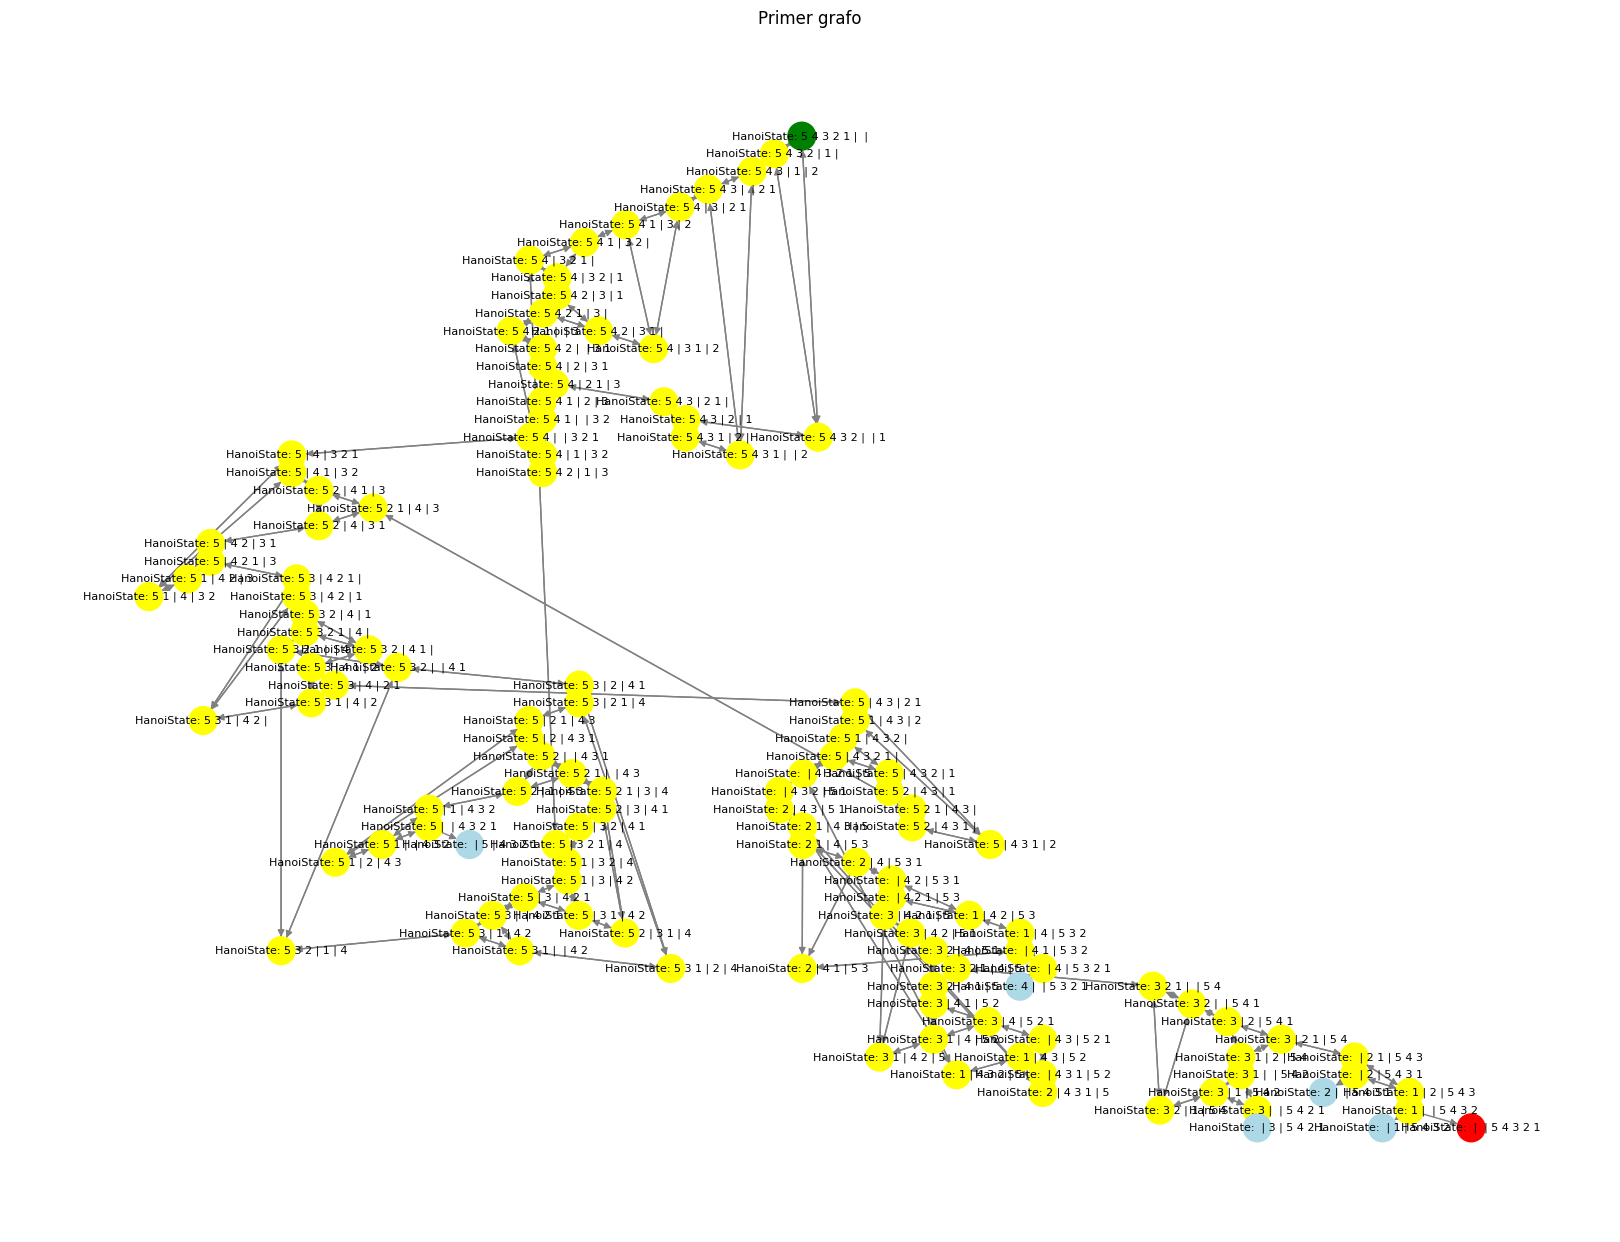

Longitud del camino de la solución: 121.0


In [18]:
#Para que se vea el grafico
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]


# Para medir tiempo consumido
start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
tracemalloc.start()
last_node = lifo_search_limit_path_cost(problem_hanoi, display=True, limit_path_cost=optimus_movent*4, draw_graph=True)
_, memory_peak = tracemalloc.get_traced_memory()
memory_peak /= 1024 * 1024
tracemalloc.stop()

end_time = time.perf_counter()
elapsed_time = end_time - start_time

if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
    print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
    last_node.generate_solution_for_simulator()

else:
    print(last_node)
    print("No se encuentra solución")

#### BUSQUEDA GREEDY

In [19]:
def funcion_heuristica (node, goal_state):
    v= 0
    for index_rod, rod in enumerate(node.state.rods):
        try:
            for disk_position in range(len(rod)):
                if rod[disk_position] == goal_state.rods[index_rod][disk_position]:
                    v-=1
        except IndexError:
            pass
    return v

In [20]:
def priority_queque_search_limit_with_graph(problem: ProblemHanoi, display: bool = False, draw_graph: bool = False, f=funcion_heuristica):

    g = nx.DiGraph()
    node=NodeHanoi(problem.initial)
    frontier = PriorityQueue()
    frontier.put((funcion_heuristica(node, problem.goal), node))
    explored = set()
        
    while not frontier.empty():
        _, node = frontier.get()
        print('nodo elegido: ',node)
        if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
            if display:
                print(len(explored), "caminos se expandieron y", frontier.qsize(), "caminos quedaron en la frontera")
                
            if draw_graph:
                plt.figure(figsize=(16,12))
                default_color = 'lightblue'
                node_colors = [default_color] * len(g.nodes())
                g_list = list(g.nodes())
                for state in explored:
                    node_colors[g_list.index(state)] = 'orange'
                node_colors[g_list.index(node.state)] = 'red'
                parent_node=node.parent
                while parent_node:
                    node_colors[g_list.index(parent_node.state)] = 'yellow'
                    if not parent_node.parent:
                        node_colors[g_list.index(parent_node.state)] = 'green' 
                    parent_node = parent_node.parent
                
                pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
                nx.draw(g, with_labels=True, pos=pos, node_color=node_colors, edge_color='gray', node_size=200, font_size=8)
                plt.title("Primer grafo")
                plt.show()
                explored.add(node.state)
            return node
            
        # Agregamos a la cola todos los nodos sucesores del nodo actual que no haya visitados
        g.add_node(node.state)
        childs = node.expand(problem)
        for child in childs:
            g.add_node(child.state)
            g.add_edge(node.state, child.state)
            if child.state not in explored:
                explored.add(child.state)
                frontier.put((funcion_heuristica(child, problem.goal), child))

    return None

In [21]:
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]

for i in range(10):
# Para medir tiempo consumido
    start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
    tracemalloc.start()
    last_node = priority_queque_search_limit_with_graph (problem= problem_hanoi, display=True, draw_graph=False, f=funcion_heuristica)
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024 * 1024
    tracemalloc.stop()

    end_time = time.perf_counter()
    elapsed_time = end_time - start_time

    if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
        print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
        last_node.generate_solution_for_simulator()

    else:
        print(last_node)
        print("No se encuentra solución")

# Imprime las métricas medidas
    print(f"Tiempo que demoró: {elapsed_time} [s]", )
    print(f"Maxima memoria ocupada: {round(memory_peak, 2)} [MB]", )
    print("----------------------------------")
    memoria.append(round(memory_peak, 2))
    tiempo.append(elapsed_time)

resultados = pd.DataFrame({'memoria':memoria, 'tiempo':tiempo})

Número optimo de movimientos: 31
nodo elegido:  <Node HanoiState: 5 4 3 2 1 |  | >
nodo elegido:  <Node HanoiState: 5 4 3 2 | 1 | >
nodo elegido:  <Node HanoiState: 5 4 3 2 |  | 1>
nodo elegido:  <Node HanoiState: 5 4 3 | 1 | 2>
nodo elegido:  <Node HanoiState: 5 4 3 2 1 |  | >
nodo elegido:  <Node HanoiState: 5 4 3 | 2 | 1>
nodo elegido:  <Node HanoiState: 5 4 3 |  | 2 1>
nodo elegido:  <Node HanoiState: 5 4 3 1 | 2 | >
nodo elegido:  <Node HanoiState: 5 4 3 | 2 1 | >
nodo elegido:  <Node HanoiState: 5 4 3 1 |  | 2>
nodo elegido:  <Node HanoiState: 5 4 | 3 | 2 1>
nodo elegido:  <Node HanoiState: 5 4 | 2 1 | 3>
nodo elegido:  <Node HanoiState: 5 4 1 | 3 | 2>
nodo elegido:  <Node HanoiState: 5 4 1 | 2 | 3>
nodo elegido:  <Node HanoiState: 5 4 | 2 | 3 1>
nodo elegido:  <Node HanoiState: 5 4 | 3 1 | 2>
nodo elegido:  <Node HanoiState: 5 4 1 | 3 2 | >
nodo elegido:  <Node HanoiState: 5 4 2 |  | 3 1>
nodo elegido:  <Node HanoiState: 5 4 2 | 3 1 | >
nodo elegido:  <Node HanoiState: 5 4 1 |  

In [22]:
print("MEDIA MEMORIA:", resultados.memoria.mean())
print("DESVIO MEMORIA:", resultados.memoria.std())
print("MEDIA TIEMPO (en segundos):", resultados.tiempo.mean())
print("DESVIO TIEMPO (en segundos):", resultados.tiempo.std())

MEDIA MEMORIA: 0.33599999999999997
DESVIO MEMORIA: 0.010749676997731395
MEDIA TIEMPO (en segundos): 0.14858736300020609
DESVIO TIEMPO (en segundos): 0.008251904745086285


In [23]:
#Camino a la solucion
node = last_node
while node.parent is not None:
    print(node.state)
    node = node.parent

HanoiState:  |  | 5 4 3 2 1
HanoiState: 1 |  | 5 4 3 2
HanoiState: 1 | 2 | 5 4 3
HanoiState:  | 2 1 | 5 4 3
HanoiState: 3 | 2 1 | 5 4
HanoiState: 3 | 2 | 5 4 1
HanoiState: 3 2 |  | 5 4 1
HanoiState: 3 2 1 |  | 5 4
HanoiState: 3 2 1 | 4 | 5
HanoiState: 3 2 | 4 1 | 5
HanoiState: 3 | 4 1 | 5 2
HanoiState: 3 | 4 | 5 2 1
HanoiState:  | 4 3 | 5 2 1
HanoiState: 1 | 4 3 | 5 2
HanoiState: 1 | 4 3 2 | 5
HanoiState:  | 4 3 2 1 | 5
HanoiState: 5 | 4 3 2 1 | 
HanoiState: 5 | 4 3 2 | 1
HanoiState: 5 2 | 4 3 | 1
HanoiState: 5 2 1 | 4 3 | 
HanoiState: 5 2 1 | 4 | 3
HanoiState: 5 2 | 4 1 | 3
HanoiState: 5 | 4 1 | 3 2
HanoiState: 5 | 4 | 3 2 1
HanoiState: 5 4 |  | 3 2 1
HanoiState: 5 4 1 |  | 3 2
HanoiState: 5 4 1 | 2 | 3
HanoiState: 5 4 | 2 1 | 3
HanoiState: 5 4 3 | 2 1 | 
HanoiState: 5 4 3 | 2 | 1
HanoiState: 5 4 3 2 |  | 1


Número optimo de movimientos: 31
nodo elegido:  <Node HanoiState: 5 4 3 2 1 |  | >
nodo elegido:  <Node HanoiState: 5 4 3 2 | 1 | >
nodo elegido:  <Node HanoiState: 5 4 3 2 |  | 1>
nodo elegido:  <Node HanoiState: 5 4 3 | 1 | 2>
nodo elegido:  <Node HanoiState: 5 4 3 2 1 |  | >
nodo elegido:  <Node HanoiState: 5 4 3 | 2 | 1>
nodo elegido:  <Node HanoiState: 5 4 3 |  | 2 1>
nodo elegido:  <Node HanoiState: 5 4 3 1 | 2 | >
nodo elegido:  <Node HanoiState: 5 4 3 | 2 1 | >
nodo elegido:  <Node HanoiState: 5 4 3 1 |  | 2>
nodo elegido:  <Node HanoiState: 5 4 | 3 | 2 1>
nodo elegido:  <Node HanoiState: 5 4 | 2 1 | 3>
nodo elegido:  <Node HanoiState: 5 4 1 | 3 | 2>
nodo elegido:  <Node HanoiState: 5 4 1 | 2 | 3>
nodo elegido:  <Node HanoiState: 5 4 | 2 | 3 1>
nodo elegido:  <Node HanoiState: 5 4 | 3 1 | 2>
nodo elegido:  <Node HanoiState: 5 4 1 | 3 2 | >
nodo elegido:  <Node HanoiState: 5 4 2 |  | 3 1>
nodo elegido:  <Node HanoiState: 5 4 2 | 3 1 | >
nodo elegido:  <Node HanoiState: 5 4 1 |  

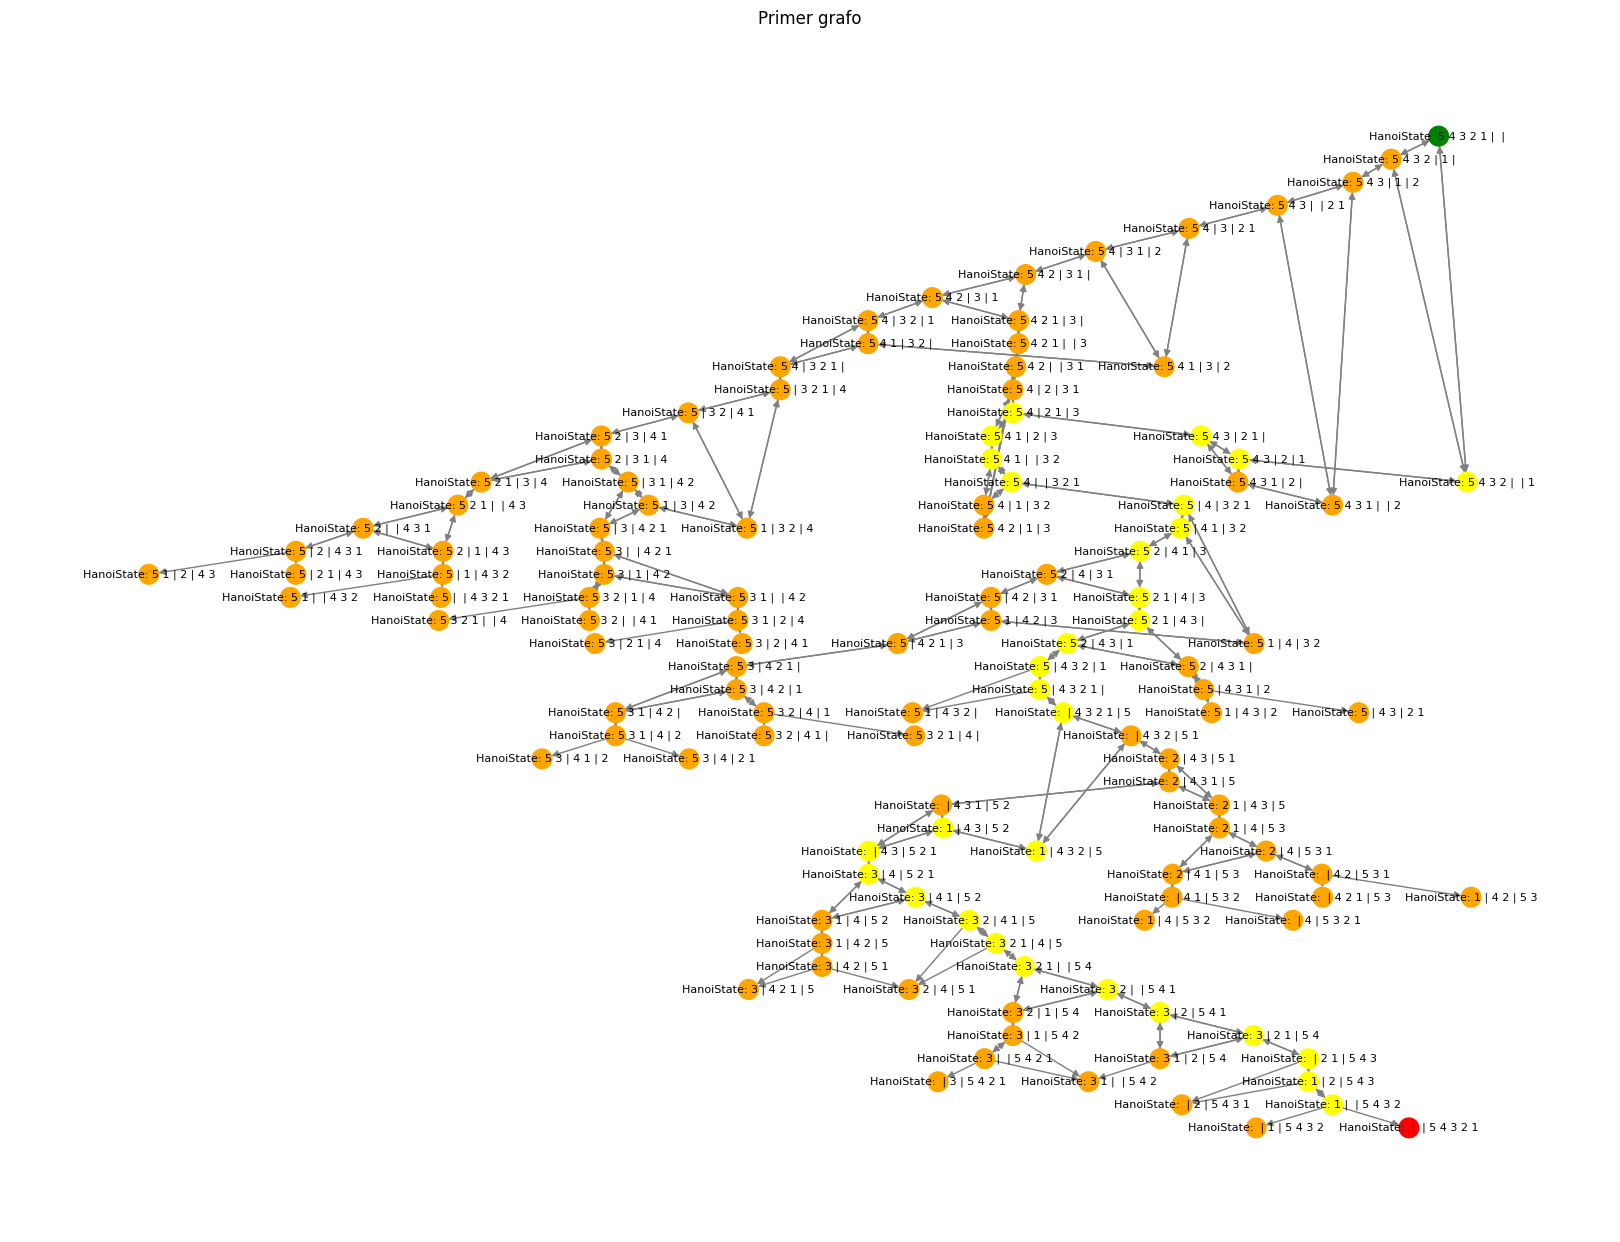

Longitud del camino de la solución: 31.0


In [24]:
#Si queremos ver el grafico
# Define el estado inicial y el estado objetivo del problema
disk_amount = 5
optimus_movent = 2 ** disk_amount - 1
print(f"Número optimo de movimientos: {optimus_movent}")
initial_state = StatesHanoi(list(range(disk_amount, 0, -1)), [], [], max_disks=disk_amount)
goal_state = StatesHanoi([], [], list(range(disk_amount, 0, -1)), max_disks=disk_amount)

# Crea una instancia del problema de la Torre de Hanoi
problem_hanoi = ProblemHanoi(initial=initial_state, goal=goal_state)
memoria=[]
tiempo=[]


# Para medir tiempo consumido
start_time = time.perf_counter()
# Para medir memoria consumida (usamos el pico de memoria)
tracemalloc.start()
last_node = priority_queque_search_limit_with_graph (problem= problem_hanoi, display=True, draw_graph=True, f=funcion_heuristica)
_, memory_peak = tracemalloc.get_traced_memory()
memory_peak /= 1024 * 1024
tracemalloc.stop()

end_time = time.perf_counter()
elapsed_time = end_time - start_time

if isinstance(last_node, NodeHanoi):
    # Imprime la longitud del camino de la solución encontrada
    print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

    # Genera los JSON para el simulador
    last_node.generate_solution_for_simulator()

else:
    print(last_node)
    print("No se encuentra solución")

IMPLEMENTACION MANUAL (CON DICCIONARIO)

In [25]:
# Inicializamos el problema
initial_state = StatesHanoi([5,4,3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5,4,3, 2, 1], max_disks=5)
problem = ProblemHanoi(initial=initial_state, goal=goal_state)

node = NodeHanoi(problem.initial)
priorizacion = {}
priorizacion[node] = funcion_heuristica(node, goal_state)
priorizacion = dict(sorted(priorizacion.items(), key=lambda item:item[1]))
explored = set()  # Este set nos permite ver si ya exploramos un estado para evitar repetir indefinidamente

# Mientras que la cola no este vacia
while len(priorizacion.keys()) != 0:
    node = list(priorizacion.keys())[0]  # Extraemos el primer nodo priorizado por la heuristica
    print('nodo elegido',node)
    del priorizacion[node]
    explored.add(node.state)
    
    if problem.goal_test(node.state):  # Comprobamos si hemos alcanzado el estado objetivo
        last_node = node
        print("Encontramos la solución")
        print(len(explored), "caminos se expandieron y", len(list(priorizacion.keys())), "caminos quedaron en la frontera")
        break
    
    # Agregamos a la cola todos los nodos sucesores del nodo actual
    for next_node in node.expand(problem):
        if next_node.state not in explored:
            priorizacion[next_node] = funcion_heuristica(next_node, goal_state)
            priorizacion = dict(sorted(priorizacion.items(), key=lambda item:item[1]))
    print('cola_prioritaria:',priorizacion)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')


nodo elegido <Node HanoiState: 5 4 3 2 1 |  | >
cola_prioritaria: {<Node HanoiState: 5 4 3 2 | 1 | >: 0, <Node HanoiState: 5 4 3 2 |  | 1>: 0}
nodo elegido <Node HanoiState: 5 4 3 2 | 1 | >
cola_prioritaria: {<Node HanoiState: 5 4 3 2 |  | 1>: 0, <Node HanoiState: 5 4 3 | 1 | 2>: 0}
nodo elegido <Node HanoiState: 5 4 3 2 |  | 1>
cola_prioritaria: {<Node HanoiState: 5 4 3 | 1 | 2>: 0, <Node HanoiState: 5 4 3 | 2 | 1>: 0}
nodo elegido <Node HanoiState: 5 4 3 | 1 | 2>
cola_prioritaria: {<Node HanoiState: 5 4 3 | 2 | 1>: 0, <Node HanoiState: 5 4 3 1 |  | 2>: 0, <Node HanoiState: 5 4 3 |  | 2 1>: 0}
nodo elegido <Node HanoiState: 5 4 3 | 2 | 1>
cola_prioritaria: {<Node HanoiState: 5 4 3 1 |  | 2>: 0, <Node HanoiState: 5 4 3 |  | 2 1>: 0, <Node HanoiState: 5 4 3 1 | 2 | >: 0, <Node HanoiState: 5 4 3 | 2 1 | >: 0}
nodo elegido <Node HanoiState: 5 4 3 1 |  | 2>
cola_prioritaria: {<Node HanoiState: 5 4 3 |  | 2 1>: 0, <Node HanoiState: 5 4 3 1 | 2 | >: 0, <Node HanoiState: 5 4 3 | 2 1 | >: 0}
n

### Revisamos como cambia el orden de la cola prioritaria en la 6ta iteracion
## NODO 5
nodo elegido <Node HanoiState: 5 4 3 | 2 | 1>


cola_prioritaria: {<Node HanoiState: 5 4 3 1 |  | 2>: 0, <Node HanoiState: 5 4 3 |  | 2 1>: 0, <Node HanoiState: 5 4 3 1 | 2 | >: 0, <Node HanoiState: 5 4 3 | 2 1 | >: 0}
## NODO 6
nodo elegido <Node HanoiState: 5 4 3 1 |  | 2>


cola_prioritaria: {<Node HanoiState: 5 4 3 |  | 2 1>: 0, <Node HanoiState: 5 4 3 1 | 2 | >: 0, <Node HanoiState: 5 4 3 | 2 1 | >: 0}

## NODO 7
nodo elegido <Node HanoiState: 5 4 3 |  | 2 1>

In [26]:
from queue import PriorityQueue
# Definición de los estados inicial y objetivo
initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)

problem = ProblemHanoi(initial=initial_state, goal=goal_state)

def greedy_best_first_graph_search(problem, heuristic_func):
    node = NodeHanoi(problem.initial)
    frontier = PriorityQueue()
    reached = set()
    frontier_items = set() 
    if problem.goal_test(node.state):
        return node
       
    frontier.put((heuristic_func(node, problem.goal), node))  # Priorizamos por la heurística
    frontier_items.add(node.state)
    reached.add(node.state)

    while not frontier.empty():
        _, node = frontier.get()
        
        print('nodo elegido',node) #hacemos print de los nodos que va eligiendo
        reached.add(node.state)

        if problem.goal_test(node.state):
            print('Encontramos la solucion!')
            print(len(reached), "caminos se expandieron y", frontier.qsize(), "caminos quedaron en la frontera")
            return node
        
        
        
        for child_node in node.expand(problem):
            if child_node.state not in frontier_items: 
                if child_node.state not in reached:
                    frontier.put((heuristic_func(child_node, problem.goal), child_node))  
                    frontier_items.add(child_node.state) 
        print('cola_prioritaria:',list(frontier.queue)) #hacemos print de las colas prioritarias    
    return 'failure'

node_final = greedy_best_first_graph_search(problem, funcion_heuristica)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

nodo elegido <Node HanoiState: 5 4 3 2 1 |  | >
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 2 | 1 | >), (0, <Node HanoiState: 5 4 3 2 |  | 1>)]
nodo elegido <Node HanoiState: 5 4 3 2 | 1 | >
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 2 |  | 1>), (0, <Node HanoiState: 5 4 3 | 1 | 2>)]
nodo elegido <Node HanoiState: 5 4 3 2 |  | 1>
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 | 1 | 2>), (0, <Node HanoiState: 5 4 3 | 2 | 1>)]
nodo elegido <Node HanoiState: 5 4 3 | 1 | 2>
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 | 2 | 1>), (0, <Node HanoiState: 5 4 3 1 |  | 2>), (0, <Node HanoiState: 5 4 3 |  | 2 1>)]
nodo elegido <Node HanoiState: 5 4 3 | 2 | 1>
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 1 |  | 2>), (0, <Node HanoiState: 5 4 3 |  | 2 1>), (0, <Node HanoiState: 5 4 3 1 | 2 | >), (0, <Node HanoiState: 5 4 3 | 2 1 | >)]
nodo elegido <Node HanoiState: 5 4 3 1 |  | 2>
cola_prioritaria: [(0, <Node HanoiState: 5 4 3 1 | 2 | >), (0, <Node HanoiState: 5 4 3 |  | 2 1>), (0, <Node

### Revisamos como cambia el orden de la cola prioritaria en la 6ta iteracion
## NODO 5
nodo elegido <Node HanoiState: 5 4 3 | 2 | 1>


cola_prioritaria: {<Node HanoiState: 5 4 3 1 |  | 2>: 0, <Node HanoiState: 5 4 3 |  | 2 1>: 0, <Node HanoiState: 5 4 3 1 | 2 | >: 0, <Node HanoiState: 5 4 3 | 2 1 | >: 0}
## NODO 6
nodo elegido <Node HanoiState: 5 4 3 1 |  | 2>


cola_prioritaria: [(0, <Node HanoiState: 5 4 3 1 | 2 | >), (0, <Node HanoiState: 5 4 3 |  | 2 1>), (0, <Node HanoiState: 5 4 3 | 2 1 | >)]

## NODO 7
nodo elegido <Node HanoiState: 5 4 3 1 | 2 | >


In [27]:

from aima import PriorityQueue

def print_priority_queue(pq):
    print("Contenido de la PriorityQueue:")
    for priority, item in pq.heap:
        print(f"Prioridad: {priority}, Nodo: {item}")

# Definición de los estados inicial y objetivo
initial_state = StatesHanoi([5, 4, 3, 2, 1], [], [], max_disks=5)
goal_state = StatesHanoi([], [], [5, 4, 3, 2, 1], max_disks=5)

problem = ProblemHanoi(initial=initial_state, goal=goal_state)


def greedy_best_first_graph_search(problem, heuristic_func):
    node = NodeHanoi(problem.initial)
    frontier = PriorityQueue(order='min', f=lambda x:  funcion_heuristica(x, goal_state)) #Inicializamos la cola prioriotaria
    frontier_items = set() 
    reached = set()
    if problem.goal_test(node.state):
        return node
    
    
    frontier.append(node)  # Priorizamos por la heurística
    frontier_items.add(node.state)
    reached.add(node.state)



    while len(frontier)>0:
        node = frontier.pop()
        reached.add(node.state)
        print('nodo elegido',node) #hacemos print de los nodos que va eligiendo
        if problem.goal_test(node.state):
            print('Encontramos la solucion')
            print(len(reached), "caminos se expandieron y", len(frontier), "caminos quedaron en la frontera")
            return node
        
        #reached.add(node.state)
        
        for child_node in node.expand(problem):
            if child_node.state not in frontier_items: 
                if child_node.state not in reached:
                
                
                    frontier.append(child_node)
                    frontier_items.add(child_node.state)
        #print_priority_queue(frontier) #hacemos print de las colas prioritarias   
            
            

    
    return 'failure'

last_node = greedy_best_first_graph_search(problem, funcion_heuristica)
print(f'Longitud del camino de la solución: {last_node.state.accumulated_cost}')

nodo elegido <Node HanoiState: 5 4 3 2 1 |  | >
nodo elegido <Node HanoiState: 5 4 3 2 | 1 | >
nodo elegido <Node HanoiState: 5 4 3 2 |  | 1>
nodo elegido <Node HanoiState: 5 4 3 | 1 | 2>
nodo elegido <Node HanoiState: 5 4 3 | 2 | 1>
nodo elegido <Node HanoiState: 5 4 3 1 |  | 2>
nodo elegido <Node HanoiState: 5 4 3 1 | 2 | >
nodo elegido <Node HanoiState: 5 4 3 |  | 2 1>
nodo elegido <Node HanoiState: 5 4 3 | 2 1 | >
nodo elegido <Node HanoiState: 5 4 | 3 | 2 1>
nodo elegido <Node HanoiState: 5 4 | 2 1 | 3>
nodo elegido <Node HanoiState: 5 4 1 | 3 | 2>
nodo elegido <Node HanoiState: 5 4 1 | 2 | 3>
nodo elegido <Node HanoiState: 5 4 | 2 | 3 1>
nodo elegido <Node HanoiState: 5 4 | 3 1 | 2>
nodo elegido <Node HanoiState: 5 4 1 | 3 2 | >
nodo elegido <Node HanoiState: 5 4 2 |  | 3 1>
nodo elegido <Node HanoiState: 5 4 2 | 3 1 | >
nodo elegido <Node HanoiState: 5 4 1 |  | 3 2>
nodo elegido <Node HanoiState: 5 4 | 3 2 | 1>
nodo elegido <Node HanoiState: 5 4 2 1 | 3 | >
nodo elegido <Node Ha